In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
### Merge 12 files (dataFrame)
path = '/Users/duclun/Desktop/stupy/salesreport/'
frames = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        frames.append(pd.read_csv(filepath))
        result = pd.concat(frames)
result.to_csv('stuSales2019.csv', index=False)
dataFrame = pd.read_csv('stuSales2019.csv')
print(dataFrame)

       Order ID                     Product Quantity Ordered Price Each  \
0        162009                      iPhone                1        700   
1        162009    Lightning Charging Cable                1      14.95   
2        162009            Wired Headphones                2      11.99   
3        162010  Bose SoundSport Headphones                1      99.99   
4        162011      34in Ultrawide Monitor                1     379.99   
...         ...                         ...              ...        ...   
186845   248146  Bose SoundSport Headphones                1      99.99   
186846   248147      AAA Batteries (4-pack)                3       2.99   
186847   248148       AA Batteries (4-pack)                1       3.84   
186848   248149        USB-C Charging Cable                1      11.95   
186849   248150       AA Batteries (4-pack)                1       3.84   

            Order Date                         Purchase Address  
0       03/28/19 20:59          9

  Order ID                     Product  Quantity Ordered  Price Each  \
0   162009                      iPhone               1.0      700.00   
1   162009    Lightning Charging Cable               1.0       14.95   
2   162009            Wired Headphones               2.0       11.99   
3   162010  Bose SoundSport Headphones               1.0       99.99   
4   162011      34in Ultrawide Monitor               1.0      379.99   

       Order Date                      Purchase Address Month   Sales  
0  03/28/19 20:59       942 Church St, Austin, TX 73301    03  700.00  
1  03/28/19 20:59       942 Church St, Austin, TX 73301    03   14.95  
2  03/28/19 20:59       942 Church St, Austin, TX 73301    03   23.98  
3  03/17/19 05:39  261 10th St, San Francisco, CA 94016    03   99.99  
4  03/10/19 00:01  764 13th St, San Francisco, CA 94016    03  379.99  
Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244

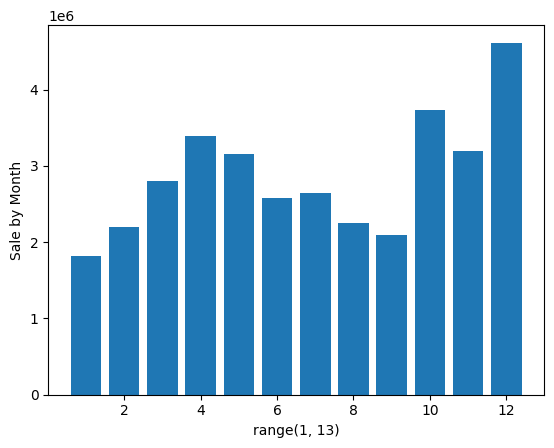

In [3]:
### Which month have the best sales?
# Extract month
dataFrame['Month'] = dataFrame['Order Date'].str[0:2]
dataFrame = dataFrame.dropna()
dataFrame = dataFrame[dataFrame['Month'] != 'Or']
#dataFrame = dataFrame[dataFrame['Month'].str.contains('Or') == False]

# Caculated Sales for each row
dataFrame['Quantity Ordered'] = dataFrame['Quantity Ordered'].astype(float)
dataFrame['Price Each'] = dataFrame['Price Each'].astype(float)

dataFrame['Sales'] = dataFrame['Quantity Ordered'] * dataFrame['Price Each']
print(dataFrame.head())

# Caculated Sales group by Month
months = range(1,13)
salesMonth = dataFrame.groupby('Month').sum()['Sales']
print(salesMonth)

# Best month
print("Highest Sales in a month:", salesMonth.max())

# Bar Graph
plt.bar(x=months,height=salesMonth)
plt.xlabel(months)
plt.ylabel('Sale by Month')
plt.show()

['Austin' 'San Francisco' 'Boston' 'Atlanta' 'Portland' 'Dallas'
 'Los Angeles' 'New York City' 'Seattle']
City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: float64
['Austin' 'San Francisco' 'Boston' 'Atlanta' 'Portland' 'Dallas'
 'Los Angeles' 'New York City' 'Seattle']


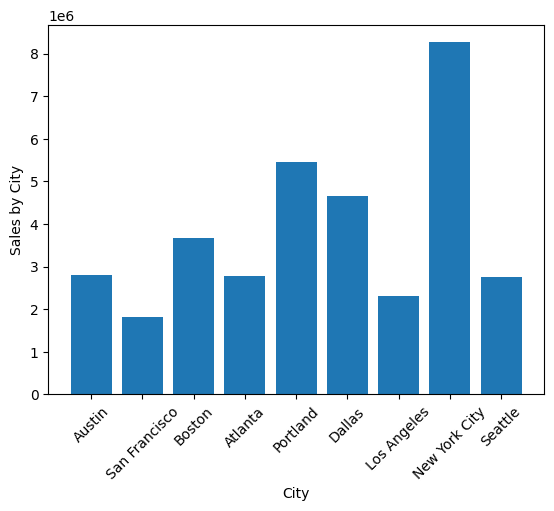

In [4]:
### Which city have the best sales?
# Find all cities
dataFrame['City'] = dataFrame['Purchase Address'].str.split(',').str[1].str.strip()
print(dataFrame['City'].unique())

# Caculated Sales group by City
salesCity = dataFrame.groupby('City').sum()['Sales']
print(salesCity)
cities = dataFrame['City'].unique()
print(cities)

# Graph
plt.bar(x = cities,height=salesCity)
plt.xlabel('City')
plt.ylabel('Sales by City')
plt.xticks(cities, rotation = 45)
plt.show()

0    20
1    20
2    20
3    05
4    00
Name: Hour, dtype: object
Hour
00     713721.27
01     460866.88
02     234851.44
03     145757.89
04     162661.01
05     230679.82
06     448113.00
07     744854.12
08    1192348.97
09    1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64


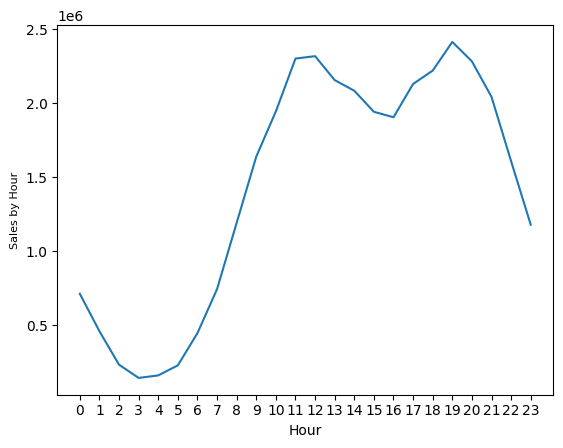

In [5]:
### Which time have the best sales?
# Extract every hours
dataFrame['Hour'] = dataFrame['Order Date'].str[9:11]
print(dataFrame['Hour'].head())
hours = range(0,24)

#Caculated Sales group by Hour
hourSales = dataFrame.groupby('Hour').sum()['Sales']
print(hourSales)

# Graph
plt.plot(hours, hourSales)
plt.xlabel('Hour')
plt.ylabel('Sales by Hour', rotation = 90, size = 8)
plt.xticks(hours)
plt.show()

In [23]:
### Những sản phẩm thường được mua cùng nhau trong 1 đơn hàng

groupProduct = lambda product: ', '.join(product)

# Extract duplicated rows
duplicateID = dataFrame[dataFrame['Order ID'].duplicated(keep=False)]
print(duplicateID.head())
duplicateID['Product List'] = duplicateID.groupby('Order ID')['Product'].transform(groupProduct)

duplicateID = duplicateID[['Order ID','Product List']].drop_duplicates()
print(duplicateID)
print(duplicateID['Product List'].value_counts())

   Order ID                   Product  Quantity Ordered  Price Each      Order Date                   Purchase Address Month   Sales         City Hour
0    162009                    iPhone               1.0      700.00  03/28/19 20:59    942 Church St, Austin, TX 73301    03  700.00       Austin   20
1    162009  Lightning Charging Cable               1.0       14.95  03/28/19 20:59    942 Church St, Austin, TX 73301    03   14.95       Austin   20
2    162009          Wired Headphones               2.0       11.99  03/28/19 20:59    942 Church St, Austin, TX 73301    03   23.98       Austin   20
30   162037                    iPhone               1.0      700.00  03/23/19 02:11  277 Elm St, Los Angeles, CA 90001    03  700.00  Los Angeles   02
31   162037  Lightning Charging Cable               1.0       14.95  03/23/19 02:11  277 Elm St, Los Angeles, CA 90001    03   14.95  Los Angeles   02
       Order ID                                       Product List
0        162009  iPhone, Li

/var/folders/yx/kk3s4m712kqdcq3l9r2rjjv40000gn/T/ipykernel_19840/465856435.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicateID['Product List'] = duplicateID.groupby('Order ID')['Product'].transform(groupProduct)


In [33]:
### What product sold the most?
print(dataFrame)
# Extract product
products = dataFrame['Product'].unique()
salesProduct = dataFrame.groupby('Product').sum()['Quantity Ordered']
print(salesProduct.sort_values(ascending=False))

       Order ID                     Product  Quantity Ordered  Price Each      Order Date                         Purchase Address Month   Sales           City Hour
0        162009                      iPhone               1.0      700.00  03/28/19 20:59          942 Church St, Austin, TX 73301    03  700.00         Austin   20
1        162009    Lightning Charging Cable               1.0       14.95  03/28/19 20:59          942 Church St, Austin, TX 73301    03   14.95         Austin   20
2        162009            Wired Headphones               2.0       11.99  03/28/19 20:59          942 Church St, Austin, TX 73301    03   23.98         Austin   20
3        162010  Bose SoundSport Headphones               1.0       99.99  03/17/19 05:39     261 10th St, San Francisco, CA 94016    03   99.99  San Francisco   05
4        162011      34in Ultrawide Monitor               1.0      379.99  03/10/19 00:01     764 13th St, San Francisco, CA 94016    03  379.99  San Francisco   00
...       